In [2]:
import numpy as np
import pandas as pd
from db_handler import DBHandler
from matplotlib import pyplot as plt
from scipy import stats
from datetime import datetime, timedelta
from calendar import monthrange
%matplotlib inline

In [3]:
def parse_fetches(fetches):
    _new_fetches = list()
    for _fetch in fetches:
        for _doi in _fetch[0].split(", "):
            _new_fetches.append(
                (_doi, _fetch[1])
            )
    return _new_fetches

def get_dois_with_videos_within_days_from_publish(df, table_name, num_days=None):
    _set_target_dois = set()
    db_handler.sql_handler.select(table_name, ["idx_paper", "publishedAt"])
    fetches = db_handler.execute().fetchall()
    fetches = parse_fetches(fetches)
    if num_days == None:
        _set_target_dois = set(map(lambda _row: _row[0], fetches))
    else:
        for _row in fetches:
    #         print("DOI:", _row[0])
            _target_paper = df[df["DOI"] == _row[0]]
    #         if len(_target_paper) == 0:
    #             continue
            if len(_target_paper) > 1:
                _target_paper = _target_paper.iloc[0]
            _dt_publish = datetime(_target_paper["Year"], _target_paper["Month"], 1)
            _dt_video_deadline = _dt_publish + timedelta(days=num_days)
            if _row[1] < _dt_video_deadline:
                _set_target_dois.add(_row[0])
    return _set_target_dois

In [33]:
df1 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_math+comp_top5perc_1901-1906.csv")
# df2 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_math+comp_top5perc_1701-1706.csv")
df3 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_math+comp_top5perc_1401-1406.csv")
db_handler = DBHandler()

In [7]:
db_handler.sql_handler.select("scopus_videos_2014_comp", ["idx_paper", "publishedAt"])
_videos_2014 = db_handler.execute().fetchall()
# db_handler.sql_handler.select("scopus_videos_2017_comp", ["idx_paper", "publishedAt"])
# _videos_2017 = db_handler.execute().fetchall()
db_handler.sql_handler.select("scopus_videos_2019_comp", ["idx_paper", "publishedAt"])
_videos_2019 = db_handler.execute().fetchall()

	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`;


In [34]:
_idx_papers_2019 = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_comp")
_idx_papers_2019_90 = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_comp", 90)
print(len(_idx_papers_2019), len(_idx_papers_2019_90))
# _idx_papers_2017 = get_dois_with_videos_within_days_from_publish(df2, "scopus_videos_2017_comp")
# _idx_papers_2017_90 = get_dois_with_videos_within_days_from_publish(df2, "scopus_videos_2017_comp", 90)
# print(len(_idx_2017), len(_idx_2017_90))
_idx_papers_2014 = get_dois_with_videos_within_days_from_publish(df3, "scopus_videos_2014_comp")
_idx_papers_2014_90 = get_dois_with_videos_within_days_from_publish(df3, "scopus_videos_2014_comp", 90)
print(len(_idx_papers_2014), len(_idx_papers_2014_90))

	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`;
64 36
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
102 25


In [35]:
print(
    len(df1[df1.DOI.isin(_idx_papers_2019)][df1["AAS"] != "None"]["AAS"].dropna()),
    len(df3[df3.DOI.isin(_idx_papers_2014)][df3["AAS"] != "None"]["AAS"].dropna())
)
print(df3[df3.DOI.isin(_idx_papers_2014)][df3["AAS"] != "None"]["AAS"].dropna())

37 60
163       5
187      84
198     461
219       2
226      11
337       3
517       2
631       1
678       2
681      27
750     171
774     515
802      15
838       2
854       1
919       1
936      10
944      97
948       3
1025     28
1151      1
1374      2
1378      1
1399    209
1505     11
1553      5
1560      2
1601      7
1629    269
1666     86
1717     88
1746     22
1886    301
1969      3
1985      2
1992      4
2003      4
2004      1
2005      1
2006      1
2007      1
2008      1
2009     25
2010      2
2042      3
2132      1
2165     44
2187      1
2348      6
2371     21
2545      4
2556      3
2560     21
2580     67
2814      9
2865      2
2959      6
2970      6
3123      3
3187      2
Name: AAS, dtype: object


/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [39]:
df3[~df3.DOI.isin(_idx_papers_2014)][df3["AAS"] != "None"]["AAS"].dropna().astype(int)

/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0       28
1       15
2        1
3       10
4        2
5        1
6        1
7        4
8        2
9        1
10       1
11       1
12       1
13       1
14       4
15      12
16       1
17       1
18       1
19       3
20       5
21       1
22       5
23       1
24       1
25       2
26       4
27       3
28       6
29       1
        ..
3312     3
3313     3
3314     3
3315     3
3316     3
3317     3
3318     3
3319     3
3320     3
3321     3
3322     3
3323     3
3324     3
3325     3
3326     3
3327     3
3328     3
3329     3
3330     3
3331     3
3332     3
3333     6
3334     1
3335     1
3336     1
3337     1
3338     6
3339     1
3340     3
3341     3
Name: AAS, Length: 3282, dtype: int64

/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/home/hw

{'boxes': [<matplotlib.lines.Line2D at 0x7fdee2689240>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdee2689cf8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdee2684710>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fdee26843c8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdee2689518>,
  <matplotlib.lines.Line2D at 0x7fdee267efd0>]}

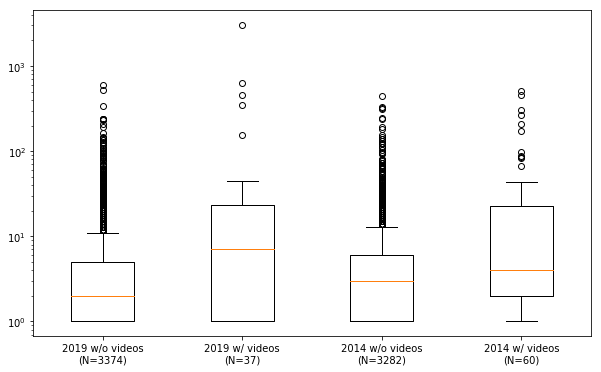

In [40]:
plt.figure(figsize=(10, 6))
plt.yscale("log")
# plt.ylim([0, 200])
plt.boxplot([
    df1[~df1.DOI.isin(_idx_papers_2019)][df1["AAS"] != "None"]["AAS"].dropna().astype(int),
    df1[df1.DOI.isin(_idx_papers_2019)][df1["AAS"] != "None"]["AAS"].dropna().astype(int),
#     df2[~df2.DOI.isin(_idx_papers_2017)]["AAS"].dropna(),
#     df2[df2.DOI.isin(_idx_papers_2017)]["AAS"].dropna(),
    df3[~df3.DOI.isin(_idx_papers_2014)][df3["AAS"] != "None"]["AAS"].dropna().astype(int),
    df3[df3.DOI.isin(_idx_papers_2014)][df3["AAS"] != "None"]["AAS"].dropna().astype(int)
],
    labels=[
        "2019 w/o videos\n(N=%s)"%len(df1[~df1.DOI.isin(_idx_papers_2019)][df1["AAS"] != "None"]["AAS"].dropna().astype(int)),
        "2019 w/ videos\n(N=%s)"%len(df1[df1.DOI.isin(_idx_papers_2019)][df1["AAS"] != "None"]["AAS"].dropna().astype(int)),
#         "2017 w/o videos\n(N=%s)"%len(df2[~df2.DOI.isin(_idx_papers_2017)]["AAS"].dropna()),
#         "2017 w/ videos\n(N=%s)"%len(df2[df2.DOI.isin(_idx_papers_2017)]["AAS"].dropna()),
        "2014 w/o videos\n(N=%s)"%len(df3[~df3.DOI.isin(_idx_papers_2014)][df3["AAS"] != "None"]["AAS"].dropna().astype(int)),
        "2014 w/ videos\n(N=%s)"%len(df3[df3.DOI.isin(_idx_papers_2014)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))
    ]
)

In [41]:
_s2019, _p2019 = stats.ttest_ind(
    df1[~df1.DOI.isin(_idx_papers_2019)][df1["AAS"] != "None"]["AAS"].dropna().astype(int),
    df1[df1.DOI.isin(_idx_papers_2019)][df1["AAS"] != "None"]["AAS"].dropna().astype(int)
)
print("2019\tS = %f\tp = %f"%(_s2019, _p2019))

_s2014, _p2014 = stats.ttest_ind(
    df3[~df3.DOI.isin(_idx_papers_2014)][df3["AAS"] != "None"]["AAS"].dropna().astype(int),
    df3[df3.DOI.isin(_idx_papers_2014)][df3["AAS"] != "None"]["AAS"].dropna().astype(int)
)
print("2014\tS = %f\tp = %f"%(_s2014, _p2014))

2019	S = -13.606527	p = 0.000000
2014	S = -13.092784	p = 0.000000


/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
